In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

colNames = ["mpg", "cylinders", "displacement", "horsepower", "weight", "acceleration", "model_year", "origin", "car_name" ]
car_data = pd.read_table("auto-mpg.data",names=colNames, delim_whitespace = True)
car_data.drop(["car_name"], inplace=True, axis=1)
car_data.describe()


,mpg,cylinders,displacement,weight,acceleration,model_year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [2]:
car_data.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight          float64
acceleration    float64
model_year        int64
origin            int64
dtype: object

In [3]:
# Selecting MilesPerGallon (mpg) as Target and Accelaration as Feature variable
model_points = pd.DataFrame(data=car_data, columns=["mpg", "acceleration"])

In [4]:
model_points.head()

,mpg,acceleration
0,18.0,12.0
1,15.0,11.5
2,18.0,11.0
3,16.0,12.0
4,17.0,10.5


In [5]:
data_points= model_points.reset_index().values

In [6]:
def gradient_descent_runner(data_points, initial_slope, initial_intercept, learning_rate, total_iteration):
    m = initial_slope
    c = initial_intercept
    mse_list = []
    for i in range(total_iteration):
        m, c = gradient_descent_step(data_points, m, c, learning_rate)
        mse_list.append(mean_squared_error(data_points, m, c))
    min_error =    min(mse_list) 
    print("="*40)
    print("MinError: {} At: {}".format(min_error,mse_list.index(min_error)))
    print("="*40)
    return [m, c]


In [18]:
def gradient_descent_step(data_points, m, c, learning_rate):
    slope_part = 0.0
    intercept_part = 0.0
    N = float(len(data_points))
    for i in data_points:
        # y = mx + c
        x = i[2]
        y = i[1]
        y_calc = m*x+c
        slope_part += (y_calc - y)*x
        intercept_part += (y_calc - y)
        
    new_m = m -  2*(learning_rate/N)*slope_part
    new_c = c - 2*(learning_rate/N)*intercept_part 
    
    return [new_m, new_c]    
    

In [8]:
def mean_squared_error(data_points, m, c):
    total_error = 0
    for i in data_points:
        
        x = i[2]
        y_original = i[1]        
        y_calculated = m*x+c
        
        total_error += (y_calculated - y_original)**2
    
    return total_error/float(len(data_points))
        

In [9]:
data_points[:10]

array([[ 0. , 18. , 12. ],
       [ 1. , 15. , 11.5],
       [ 2. , 18. , 11. ],
       [ 3. , 16. , 12. ],
       [ 4. , 17. , 10.5],
       [ 5. , 15. , 10. ],
       [ 6. , 14. ,  9. ],
       [ 7. , 14. ,  8.5],
       [ 8. , 14. , 10. ],
       [ 9. , 15. ,  8.5]])

In [19]:
learning_rate = 0.0001
num_iteration = 1000

print("At Start:\nSlope: {}\nIntercept: {}\nMSE: {}".format(0, 0, mean_squared_error(data_points, 0, 0)))

# print("At Start:\nSlope: {}\nIntercept: {}\nMSE: {}".format(1.12,6.01, mean_squared_error(data_points, 40.3623236,23.00744078)))
[slope, intercept] = gradient_descent_runner(data_points, 0 , 0, learning_rate, num_iteration)
print("\nAfter loop")
print("="*40)
print("Slope: {}\nIntercept: {}\nMSE: {}".format(slope, intercept, mean_squared_error(data_points, slope, intercept)))

At Start:
Slope: 0
Intercept: 0
MSE: 613.8712562814071
MinError: 50.8852731718681 At: 999

After loop
Slope: 1.4931509862180814
Intercept: 0.12252253313266277
MSE: 50.8852731718681


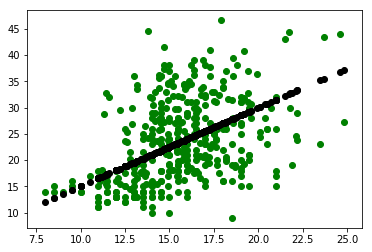

In [52]:
predicted_y = slope*model_points.acceleration+intercept

plt.scatter(model_points.acceleration,new_df.mpg, color='green')
plt.scatter(model_points.acceleration,predicted_y, color='black')

plt.show()    

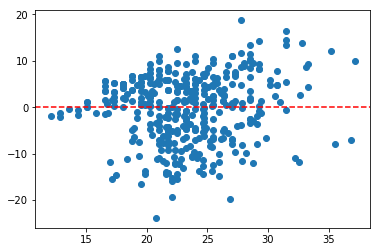

In [53]:
predicted_y = slope*model_points.acceleration+intercept

plt.scatter(predicted_y,predicted_y-model_points.mpg)
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

In [20]:
# feature scaling for acceleration

new_df = model_points.copy(deep=True)

mean_acceleartion = np.mean(model_points.acceleration)
max_acceleration = max(model_points.acceleration)
min_acceleration = min(model_points.acceleration)

new_df.acceleration = (model_points.acceleration - mean_acceleartion)/(max_acceleration - min_acceleration)

In [21]:
data_points_new= new_df.reset_index().values

In [22]:
learning_rate_new = 0.93
num_iteration_new = 400

print("At Start:\nSlope: {}\nIntercept: {}\nMSE: {}".format(0, 0, mean_squared_error(data_points_new, 0, 0)))

# print("At Start:\nSlope: {}\nIntercept: {}\nMSE: {}".format(1.12,6.01, mean_squared_error(data_points, 40.3623236,23.00744078)))
[slope_new, intercept_new] = gradient_descent_runner(data_points_new, 0 , 0, learning_rate_new, num_iteration_new)
print("\nAfter loop")
print("="*40)
print("Slope: {}\nIntercept: {}\nMSE: {}".format(slope, intercept, mean_squared_error(data_points_new, slope_new, intercept_new)))

At Start:
Slope: 0
Intercept: 0
MSE: 613.8712562814071
MinError: 50.17219440770129 At: 376

After loop
Slope: 1.4931509862180814
Intercept: 0.12252253313266277
MSE: 50.17219440770134


In [15]:
# With feature scaling and new learning rate gradient descent convergence was faster with negligible improvement in MSE error

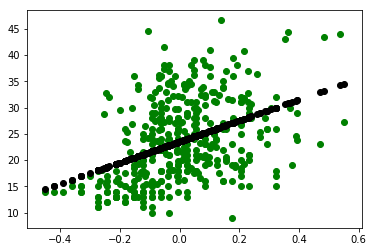

In [38]:
predicted_value = slope_new*new_df.acceleration+intercept_new

plt.scatter(new_df.acceleration,new_df.mpg, color='green')
plt.scatter(new_df.acceleration,predicted_value, color='black')

plt.show()


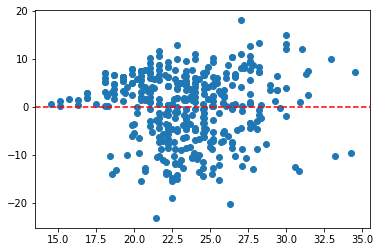

In [40]:
# Residual data plot
plt.scatter(predicted_value, predicted_value - new_df.mpg)
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

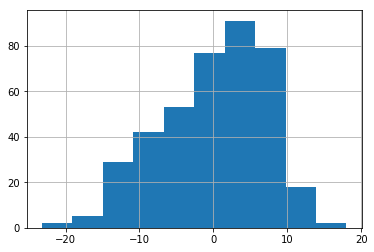

In [44]:
(predicted_value - new_df.mpg).hist()
plt.show()